## Importing files

In [0]:
!git clone 'https://github.com/imneonizer/face-app'
import os
os.chdir('face-app')
!pip install -r Requirements.txt

## Training the model

In [0]:
!python train_model.py --augment 5

## Testing the model

In [0]:
# import the necessary packages
import face_recognition
import argparse
import pickle
import cv2
import imutils

import os
os.chdir('/content/face-app')

# load the known faces and embeddings
data = pickle.loads(open('model/encodings.pkl', 'rb').read())

def recognize(image):
  rgb = image
  # detect the (x, y)-coordinates of the bounding boxes corresponding
  # to each face in the input image, then compute the facial embeddings
  # for each face
  #print(">> recognizing faces")
  boxes = face_recognition.face_locations(rgb,
    model='cnn')
  
  encodings = face_recognition.face_encodings(rgb, boxes)

  # initialize the list of names for each face detected
  names = []

  # loop over the facial embeddings
  for encoding in encodings:
    # attempt to match each face in the input image to our known
    # encodings
    matches = face_recognition.compare_faces(data["encodings"],
      encoding)
    name = "Unknown"

    # check to see if we have found a match
    if True in matches:
      # find the indexes of all matched faces then initialize a
      # dictionary to count the total number of times each face
      # was matched
      matchedIdxs = [i for (i, b) in enumerate(matches) if b]
      counts = {}

      # loop over the matched indexes and maintain a count for
      # each recognized face face
      for i in matchedIdxs:
        name = data["names"][i]
        counts[name] = counts.get(name, 0) + 1

      # determine the recognized face with the largest number of
      # votes (note: in the event of an unlikely tie Python will
      # select first entry in the dictionary)
      name = max(counts, key=counts.get)

    # update the list of names
    names.append(name)

  # loop over the recognized faces
  for ((top, right, bottom, left), name) in zip(boxes, names):
    # draw the predicted face name on the image
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,
      0.75, (0, 255, 0), 2)

  return image, names
  # show the output image
  #cv2.imshow("Image", image)
  #cv2.waitKey(0)

#### Displaying output
Actual FPS goes upto 30, its because we are plotting the image in an inefficient way on colab that it slows the loop.
so we are only counting fps with the time eapsed between processing frames and not including displaying time.

FPS: 20
['nitin']


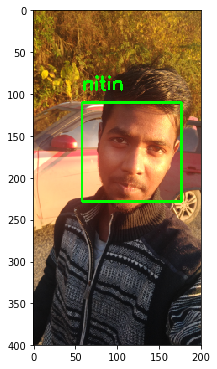

In [52]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import cv2
import imutils
import time

import os
os.chdir('/content/face-app')

img = cv2.imread('examples/1.jpg') #[1,2,3,4].jpg
h, w = img.shape[:2]
if h>w:
  img = imutils.resize(img, height=400)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
else:
  img = imutils.resize(img, width=400)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

while True:
  try:
    
    st = time.time()
    frame, names = recognize(img.copy())
    et = time.time()-st
    
    plt.figure(figsize = (3,200))
    plt.imshow(frame)
    clear_output(wait=True)
    print(f'FPS: {round((1/et))}')
    print(names)
    plt.show()

  except KeyboardInterrupt:
    break